In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import plotly.express as px

In [2]:
## Leemos nuestros datos y los visualizamos
df = pd.read_csv('datasets/df_complete_lat_long.csv')
df.head(3)

,terreno,construccion,recamaras,banos,estacionamientos,ubicacion,precio,anio_construct,cp,alcaldia,colonia,grado_marginalidad,pob_2010,tipo_seccion,tipo_col,precio_str,lat_long,lat,long
0,61.5,61.5,2.0,1.0,1,"Doctores, Cuauhtémoc, Ciudad De México 06720, ...",2900000.0,2022.0,6720,CUAUHTEMOC,DOCTORES I,5.0,44703.0,URBANO(A),COLONIA,"$2,900,000 MXN","(19.4326296, -99.1331785)",19.43263,-99.133178
1,55.2,55.2,1.0,1.0,1,"Doctores, Cuauhtémoc, Ciudad De México 06720, ...",3200000.0,2018.0,6720,CUAUHTEMOC,DOCTORES I,5.0,44703.0,URBANO(A),COLONIA,"$3,200,000 MXN","(19.4326296, -99.1331785)",19.43263,-99.133178
2,42.0,42.0,1.0,1.0,0,"Roma Norte, Cuauhtémoc, Ciudad De México 06700...",2137000.0,1972.0,6700,CUAUHTEMOC,ROMA NORTE I,3.0,27770.0,URBANO(A),COLONIA,"$2,137,000 MXN","(19.4326296, -99.1331785)",19.43263,-99.133178


In [3]:
## Obtenemos la descripcion de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   terreno             1068 non-null   float64
 1   construccion        1068 non-null   float64
 2   recamaras           1068 non-null   float64
 3   banos               1068 non-null   float64
 4   estacionamientos    1068 non-null   int64  
 5   ubicacion           1068 non-null   object 
 6   precio              1068 non-null   float64
 7   anio_construct      1068 non-null   float64
 8   cp                  1068 non-null   int64  
 9   alcaldia            1068 non-null   object 
 10  colonia             1068 non-null   object 
 11  grado_marginalidad  1068 non-null   float64
 12  pob_2010            1068 non-null   float64
 13  tipo_seccion        1068 non-null   object 
 14  tipo_col            1068 non-null   object 
 15  precio_str          1068 non-null   object 
 16  lat_lo

In [4]:
## Obtenemos lor principales medidas estadisticas de resumen
df.describe()

,terreno,construccion,recamaras,banos,estacionamientos,precio,anio_construct,cp,grado_marginalidad,pob_2010,lat,long
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1.068000e+03,1068.000000,1068.000000,1068.000000,1068.000000,1.068000e+03,1068.000000
mean,224.533521,206.178933,3.013109,2.422285,2.331461,8.398544e+06,1996.877341,6680.009363,2.538390,14059.282772,1.943263e+01,-99.133178
std,392.572682,187.582327,1.502830,1.373381,6.900733,1.056286e+07,25.758465,4410.354391,1.351672,14576.235171,3.554378e-15,0.000000
min,18.000000,30.000000,1.000000,1.000000,0.000000,6.800000e+05,1893.000000,1000.000000,1.000000,355.000000,1.943263e+01,-99.133178
25%,75.000000,79.000000,2.000000,2.000000,1.000000,3.300000e+06,1983.000000,3230.000000,1.000000,5248.750000,1.943263e+01,-99.133178
50%,125.000000,140.000000,3.000000,2.000000,2.000000,5.419530e+06,2004.000000,5300.000000,2.000000,9815.000000,1.943263e+01,-99.133178
75%,218.000000,270.000000,3.000000,3.000000,2.000000,9.158750e+06,2018.000000,9852.500000,4.000000,17464.000000,1.943263e+01,-99.133178
max,7671.000000,2000.000000,15.000000,17.000000,215.000000,1.350000e+08,2025.000000,16770.000000,5.000000,111728.000000,1.943263e+01,-99.133178


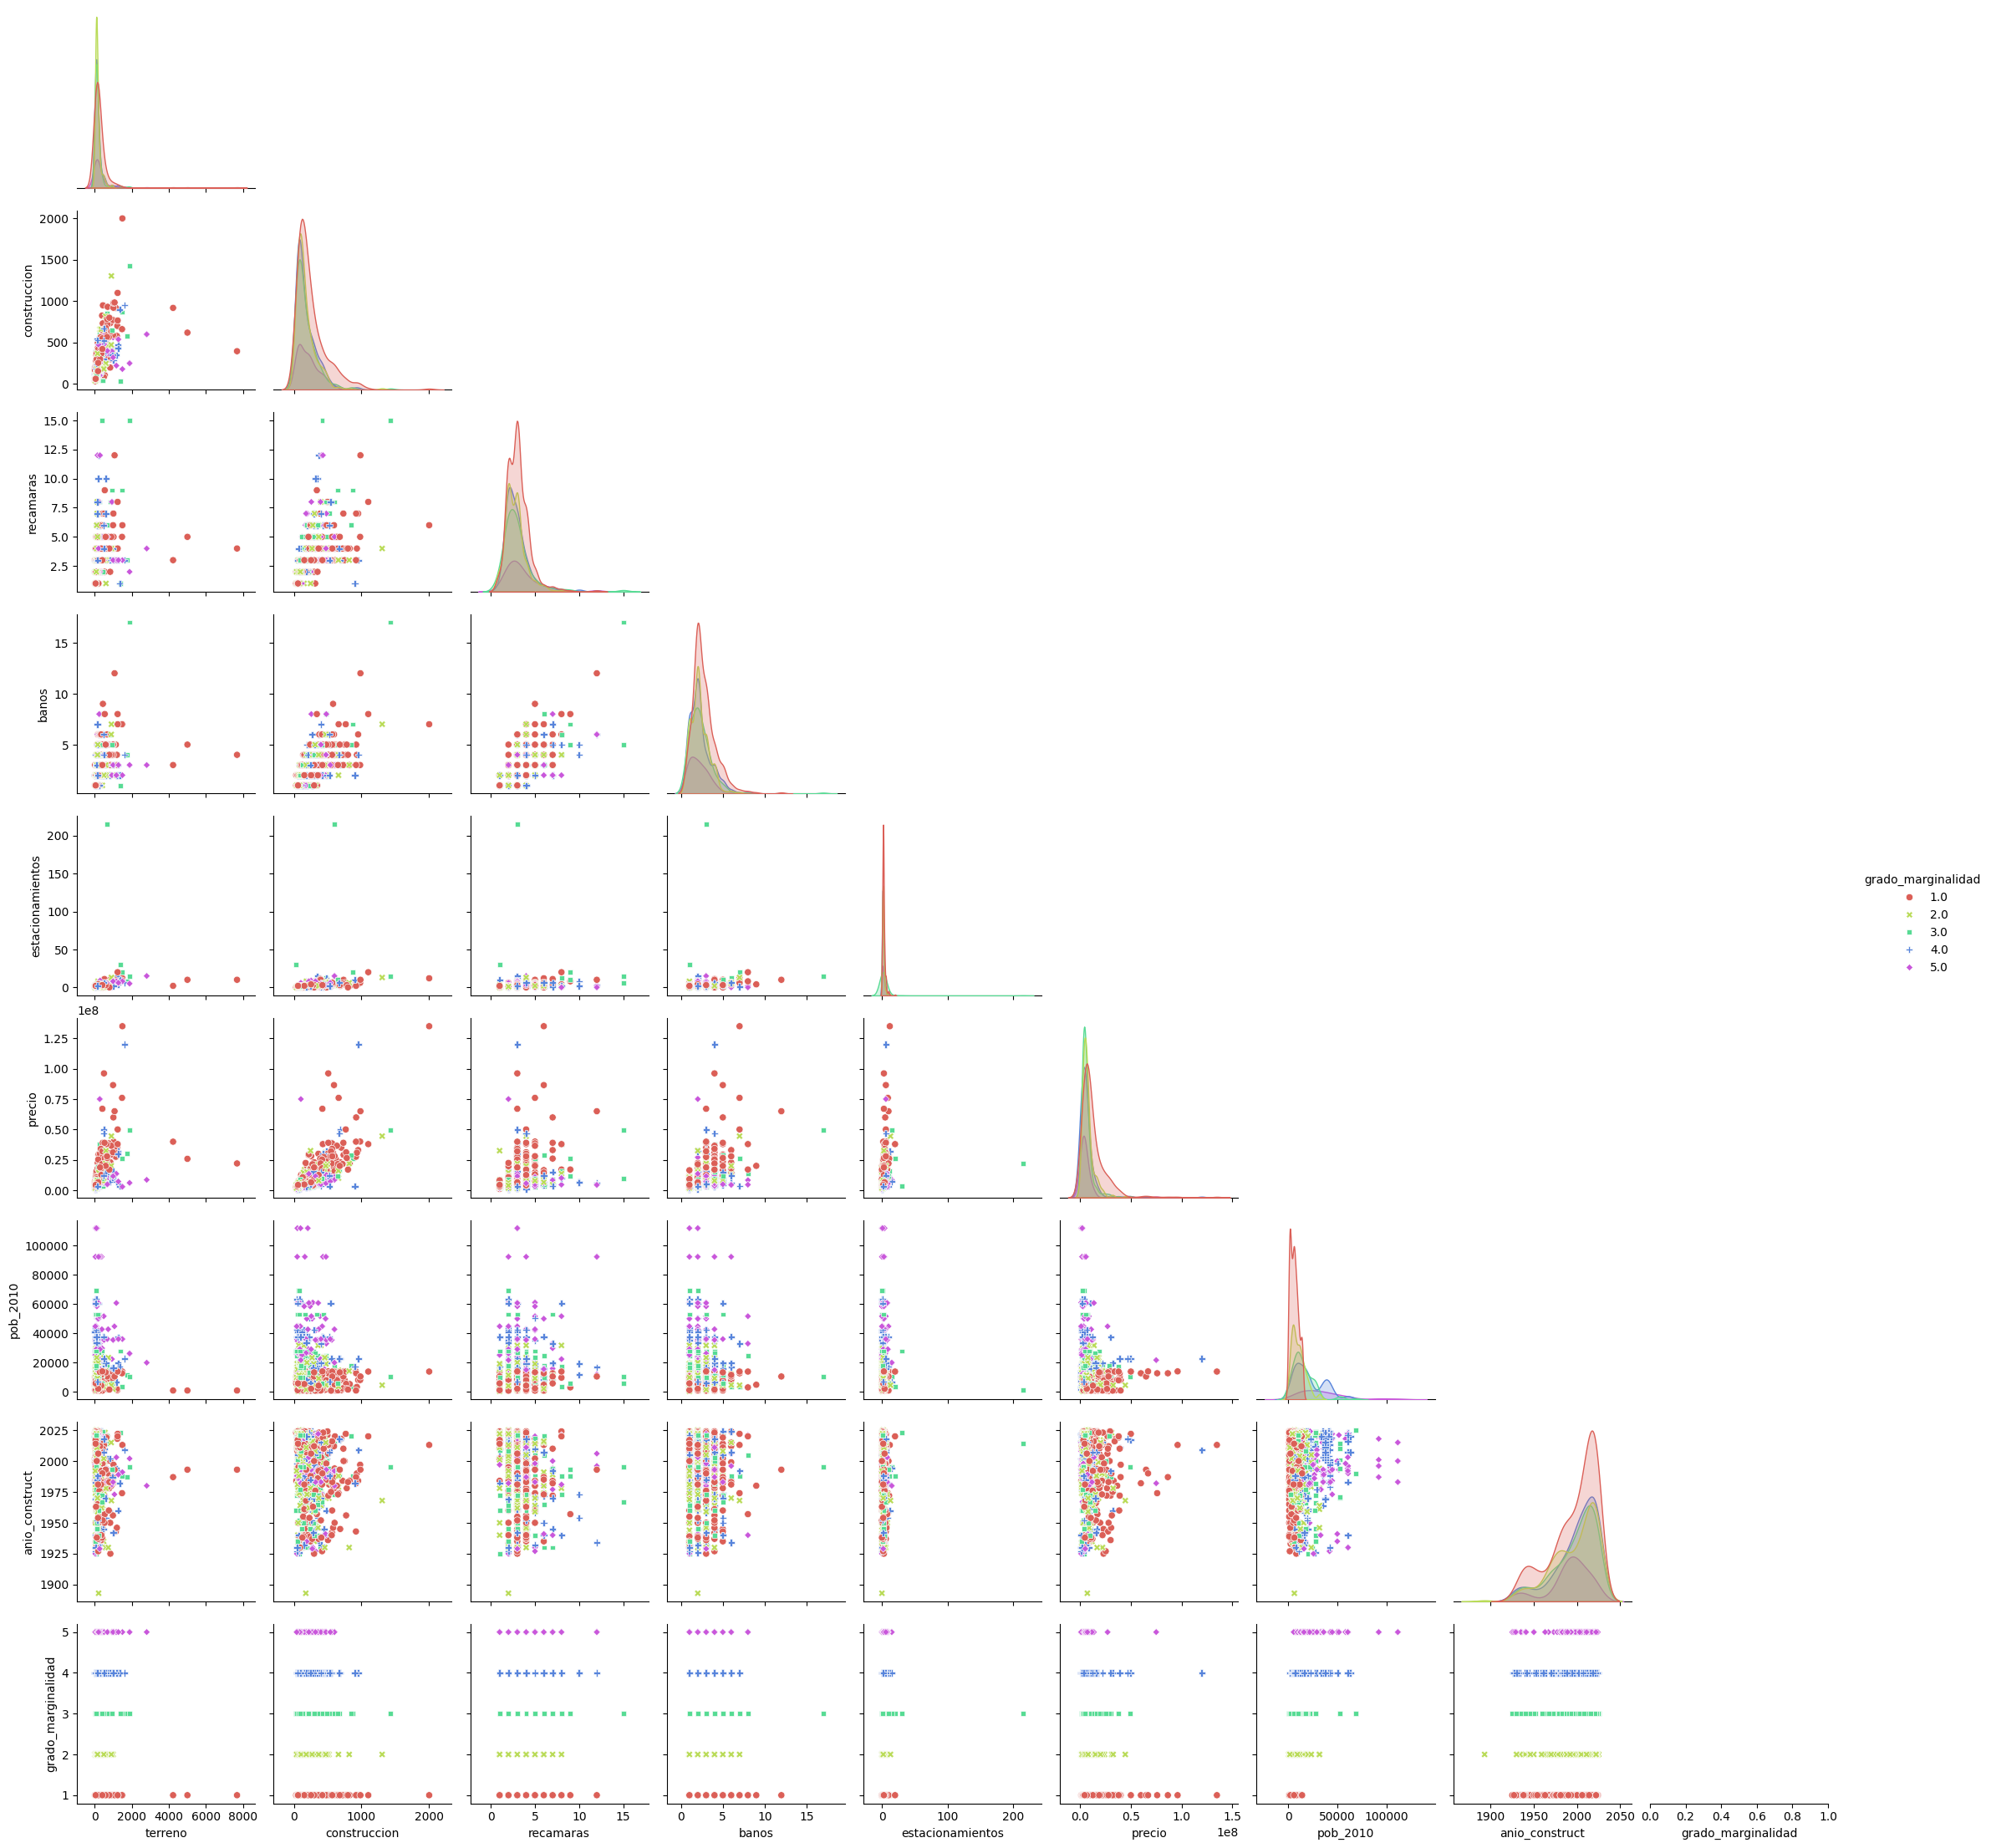

In [51]:
## Comenzamos a graficar nuestros datos
# Graficaremos todas las relaciones de nuestros 
sbn.pairplot(df, corner=True, vars=['terreno','construccion','recamaras','banos','estacionamientos','precio',
                                    'pob_2010','anio_construct','grado_marginalidad'], hue='grado_marginalidad', 
             palette=sbn.color_palette("hls", 5), markers=True)

Datos totales 1068
Media 224.53352059925098 Mediana 125.0 Desviacion std 392.5726821833009
Quaniles:
0.25     75.000
0.50    125.000
0.75    218.000
0.97    996.151
Name: terreno, dtype: float64
Inmuebles por debajo de 1000m2 1037 0.9709737827715356%


<Axes: xlabel='terreno'>

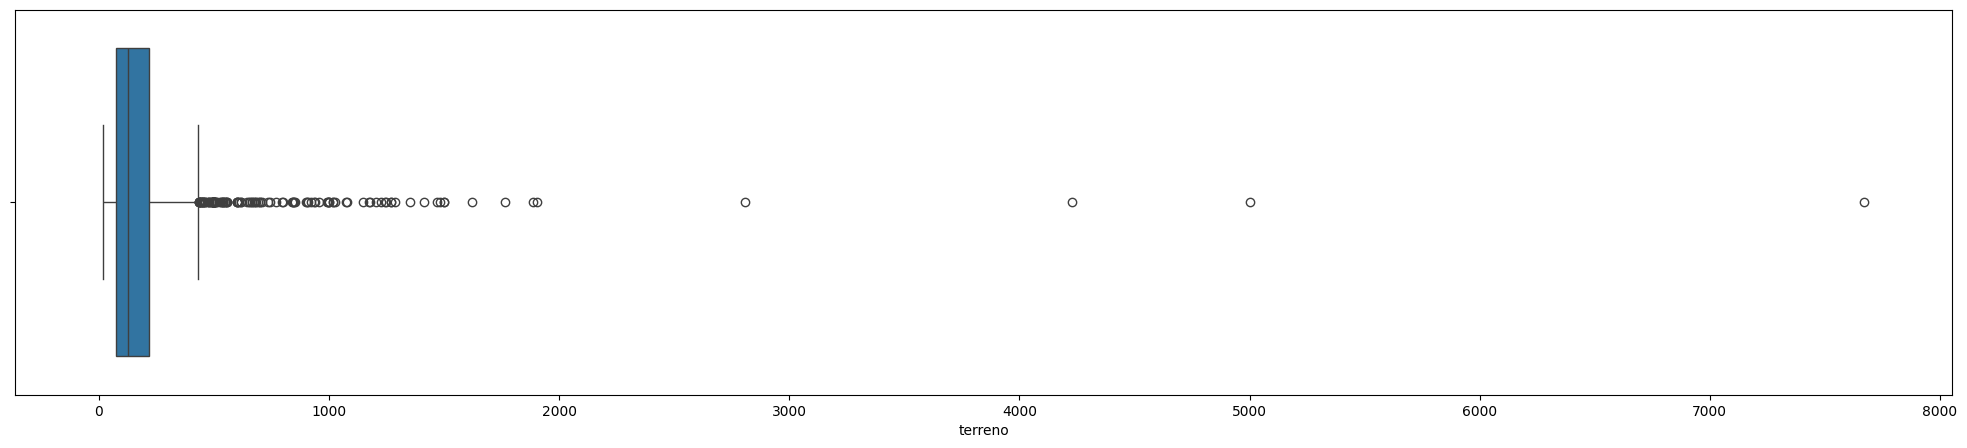

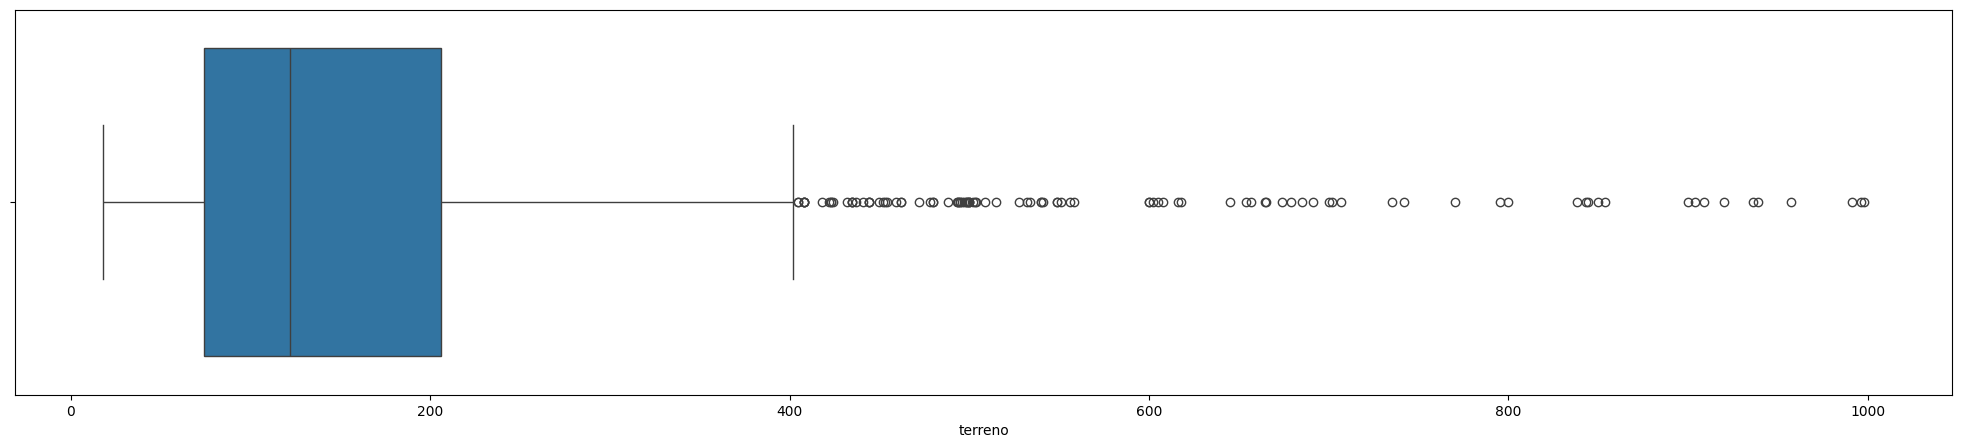

In [6]:
## Revisamos un poco las distribuciones que habiamos notado con outliers
plt.figure(figsize=(25,5))
sbn.boxplot(df['terreno'],legend=True, orient='h')
print(f'Datos totales {df.shape[0]}')
print(f'Media {df["terreno"].mean()} Mediana {df["terreno"].median()} Desviacion std {df["terreno"].std()}')
print('Quaniles:')
print(df["terreno"].quantile([.25, .5, .75, .97]))
print(f'Inmuebles por debajo de 1000m2 {df[df["terreno"]<1000].shape[0]} {df[df["terreno"]<1000].shape[0]/df.shape[0]}%')
plt.figure(figsize=(25,5))
sbn.boxplot(df[df['terreno']<1000]['terreno'],legend=True, orient='h')

In [7]:
## Dado lo visto algunos valores parecen estar muy alejados de la mediana siendo muy atitpicos
## Aunque es muy probable que si existan 
## Por lo cual procedemos a ir depurando y nos quedaremos con un 97% de los datos con un maximo de 1000m2
## Pero dejaremos intacto el conjunto original para tambien entrenar despues sobre el
df_depurado =  df[df["terreno"]<1000]
df_depurado.shape

(1037, 19)

Datos totales 1068
Media 206.17893258426966 Mediana 140.0 Desviacion std 187.5823271080812
Quaniles:
0.25     79.00
0.50    140.00
0.75    270.00
0.97    659.99
Name: construccion, dtype: float64
Inmuebles por debajo de 1000m2 1064 0.9962546816479401%


<Axes: xlabel='construccion'>

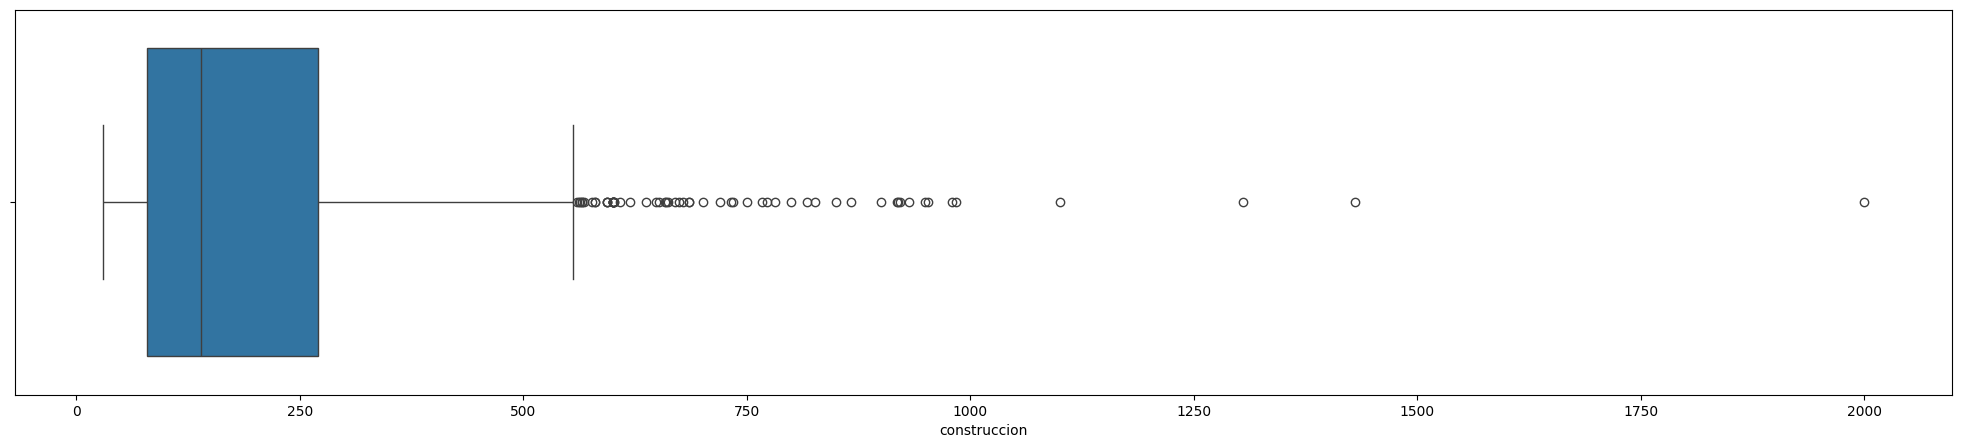

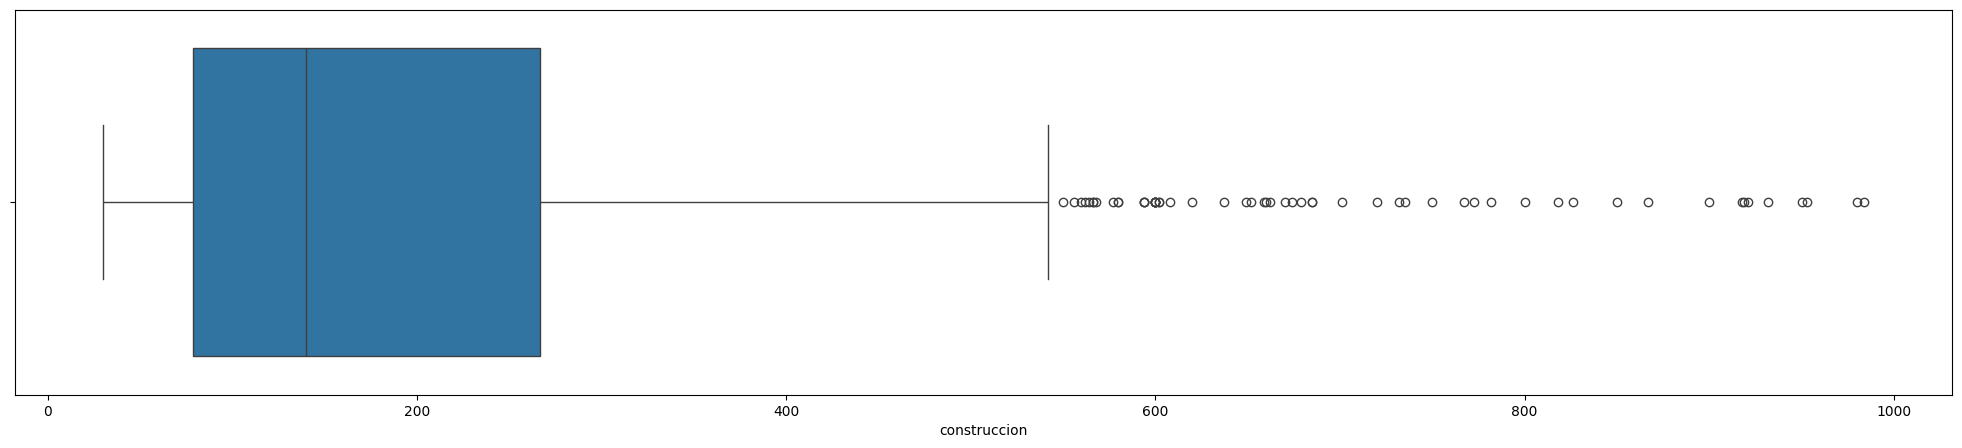

In [8]:
## Revisamos un poco las distribuciones  que habiamos notado con outliers
plt.figure(figsize=(25,5))
sbn.boxplot(df['construccion'],legend=True, orient='h')
print(f'Datos totales {df.shape[0]}')
print(f"Media {df['construccion'].mean()} Mediana {df['construccion'].median()} Desviacion std {df['construccion'].std()}")
print('Quaniles:')
print(df['construccion'].quantile([.25, .5, .75, .97]))
print(f"Inmuebles por debajo de 1000m2 {df[df['construccion']<1000].shape[0]} {df[df['construccion']<1000].shape[0]/df.shape[0]}%")
plt.figure(figsize=(25,5))
sbn.boxplot(df[df['construccion']<1000]['construccion'],legend=True, orient='h')

<Axes: xlabel='construccion'>

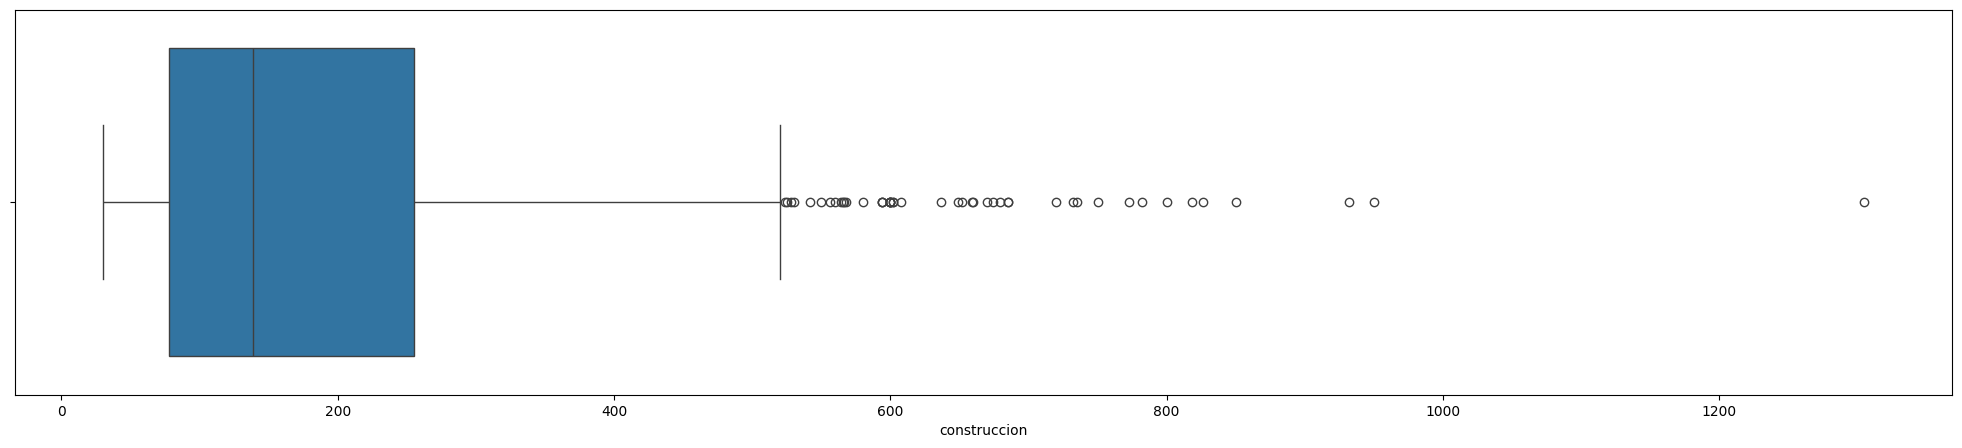

In [9]:
## revisamos la distribucion de construccion en los datos depurados
## Y vemos que al limitar el terreno y eliminar los valores atipicos tambien se vieron reducidos los valores atipicosabs 
## del campo de construccion
plt.figure(figsize=(25,5))
sbn.boxplot(df_depurado['construccion'],legend=True, orient='h')

Datos totales 1068
Media 2.331460674157303 Mediana 2.0 Desviacion std 6.900732946779144
Quaniles:
0.25    1.00
0.50    2.00
0.75    2.00
0.97    7.99
Name: estacionamientos, dtype: float64
Inmuebles por debajo de 1000m2 1067 0.9990636704119851%


<Axes: xlabel='estacionamientos'>

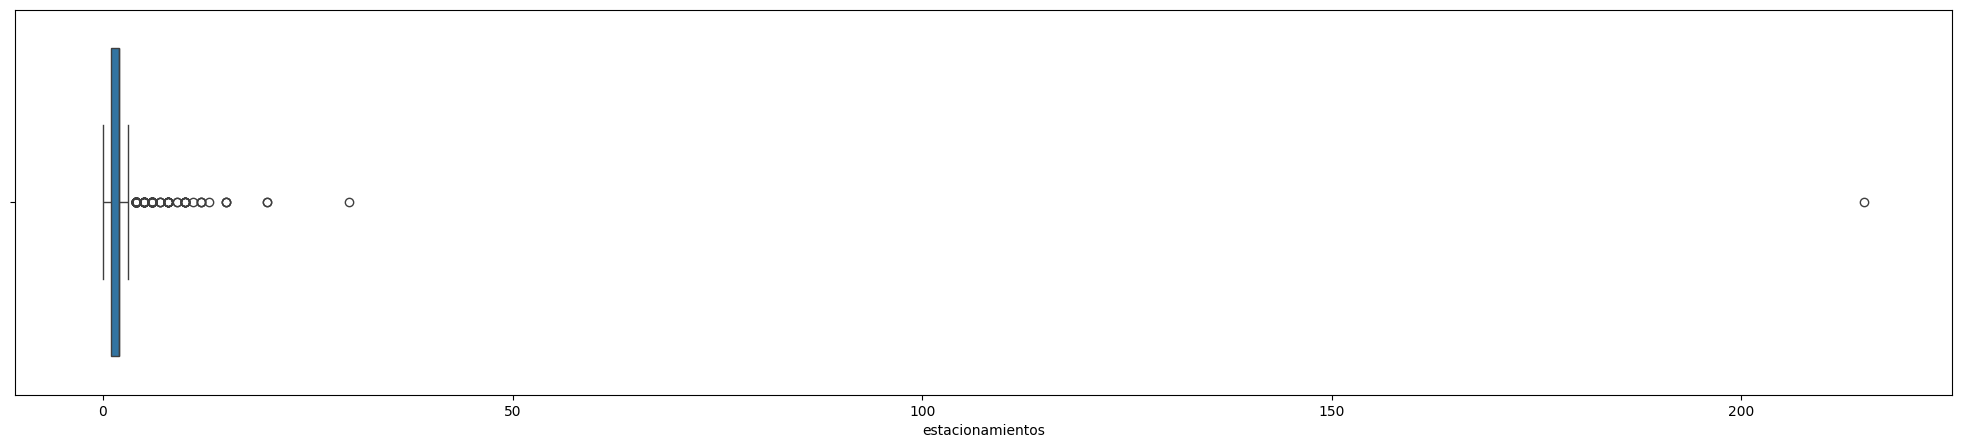

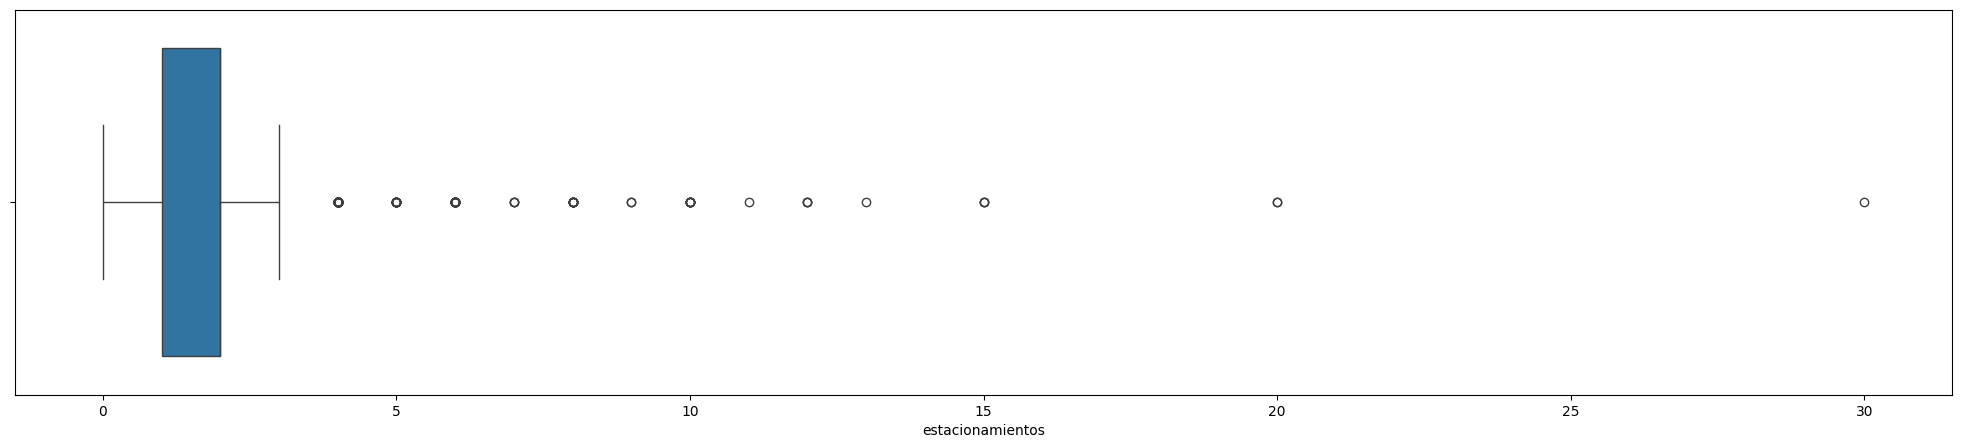

In [10]:
## Revisamos un poco las distribuciones  que habiamos notado con outliers
plt.figure(figsize=(25,5))
sbn.boxplot(df['estacionamientos'],legend=True, orient='h')
print(f'Datos totales {df.shape[0]}')
print(f"Media {df['estacionamientos'].mean()} Mediana {df['estacionamientos'].median()} Desviacion std {df['estacionamientos'].std()}")
print('Quaniles:')
print(df['estacionamientos'].quantile([.25, .5, .75, .97]))
print(f"Inmuebles por debajo de 1000m2 {df[df['estacionamientos']<35].shape[0]} {df[df['estacionamientos']<35].shape[0]/df.shape[0]}%")
plt.figure(figsize=(25,5))
sbn.boxplot(df[df['estacionamientos']<35]['estacionamientos'],legend=True, orient='h')

In [11]:
# Considerando que contar con mas de 215 estacionamientos suena poco creible
# Se decide quitar este outlier
df_depurado = df_depurado[df_depurado['estacionamientos']<35]
df_depurado.shape

(1036, 19)

In [12]:
## Revisamos denuevo nuestras metricas resumen ya depurado
df_depurado.describe()

,terreno,construccion,recamaras,banos,estacionamientos,precio,anio_construct,cp,grado_marginalidad,pob_2010,lat,long
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1.036000e+03,1036.000000,1036.000000,1036.000000,1036.000000,1.036000e+03,1.036000e+03
mean,177.673842,191.751834,2.970077,2.359073,1.914093,7.624219e+06,1997.089768,6592.722008,2.527992,13940.676641,1.943263e+01,-9.913318e+01
std,162.802983,157.175011,1.414921,1.223926,1.635167,8.145698e+06,25.866559,4345.687964,1.339186,14560.360740,7.108859e-15,1.421772e-14
min,18.000000,30.000000,1.000000,1.000000,0.000000,6.800000e+05,1893.000000,1000.000000,1.000000,355.000000,1.943263e+01,-9.913318e+01
25%,73.850000,77.750000,2.000000,2.000000,1.000000,3.300000e+06,1983.000000,3230.000000,1.000000,5116.000000,1.943263e+01,-9.913318e+01
50%,122.000000,138.450000,3.000000,2.000000,2.000000,5.249651e+06,2004.000000,5270.000000,2.000000,9765.000000,1.943263e+01,-9.913318e+01
75%,206.000000,254.625000,3.000000,3.000000,2.000000,8.820000e+06,2019.000000,9700.000000,4.000000,17464.000000,1.943263e+01,-9.913318e+01
max,998.000000,1305.000000,15.000000,9.000000,13.000000,9.617089e+07,2025.000000,16770.000000,5.000000,111728.000000,1.943263e+01,-9.913318e+01


In [151]:
df_depurado.columns

Index(['terreno', 'construccion', 'recamaras', 'banos', 'estacionamientos',
       'ubicacion', 'precio', 'anio_construct', 'cp', 'alcaldia', 'colonia',
       'grado_marginalidad', 'pob_2010', 'tipo_seccion', 'tipo_col',
       'precio_str', 'lat_long', 'lat', 'long'],
      dtype='object')

In [152]:
df_depurado.shape

(1036, 19)

In [153]:
str_cols = ['ubicacion','alcaldia','colonia','lat_long','lat','long','tipo_col','tipo_seccion','precio_str']
numeric_cols = list(set(df_depurado.columns)-set(str_cols))

In [173]:
# Separamos nuestras caracteristicas en numericas y no numericas
df_num_vars = df_depurado[numeric_cols]
df_str_vars = df_depurado[str_cols]
# Tambien guardamos nuestro targetabs
target = df_depurado['precio']
print(df_num_vars.shape, df_str_vars.shape, target.shape)

(1036, 10) (1036, 9) (1036,)


In [174]:
## obtenemos la matriz de correlacion
correlation = df_num_vars.corr()
correlation

,precio,recamaras,estacionamientos,cp,construccion,grado_marginalidad,pob_2010,terreno,anio_construct,banos
precio,1.000000,0.295922,0.543845,-0.041912,0.688455,-0.280096,-0.119015,0.660661,-0.096720,0.514814
recamaras,0.295922,1.000000,0.415240,0.123067,0.599724,0.072594,0.038049,0.462720,-0.341293,0.645029
estacionamientos,0.543845,0.415240,1.000000,-0.016239,0.630100,-0.108544,-0.098534,0.669296,-0.090049,0.517511
cp,-0.041912,0.123067,-0.016239,1.000000,0.037325,0.182509,0.256926,0.078111,-0.118786,-0.023302
construccion,0.688455,0.599724,0.630100,0.037325,1.000000,-0.123130,-0.060542,0.779431,-0.288227,0.710780
grado_marginalidad,-0.280096,0.072594,-0.108544,0.182509,-0.123130,1.000000,0.561870,-0.097726,-0.011439,-0.111654
pob_2010,-0.119015,0.038049,-0.098534,0.256926,-0.060542,0.561870,1.000000,-0.063626,0.008820,-0.062927
terreno,0.660661,0.462720,0.669296,0.078111,0.779431,-0.097726,-0.063626,1.000000,-0.246990,0.572930
anio_construct,-0.096720,-0.341293,-0.090049,-0.118786,-0.288227,-0.011439,0.008820,-0.246990,1.000000,-0.126787
banos,0.514814,0.645029,0.517511,-0.023302,0.710780,-0.111654,-0.062927,0.572930,-0.126787,1.000000


<Axes: >

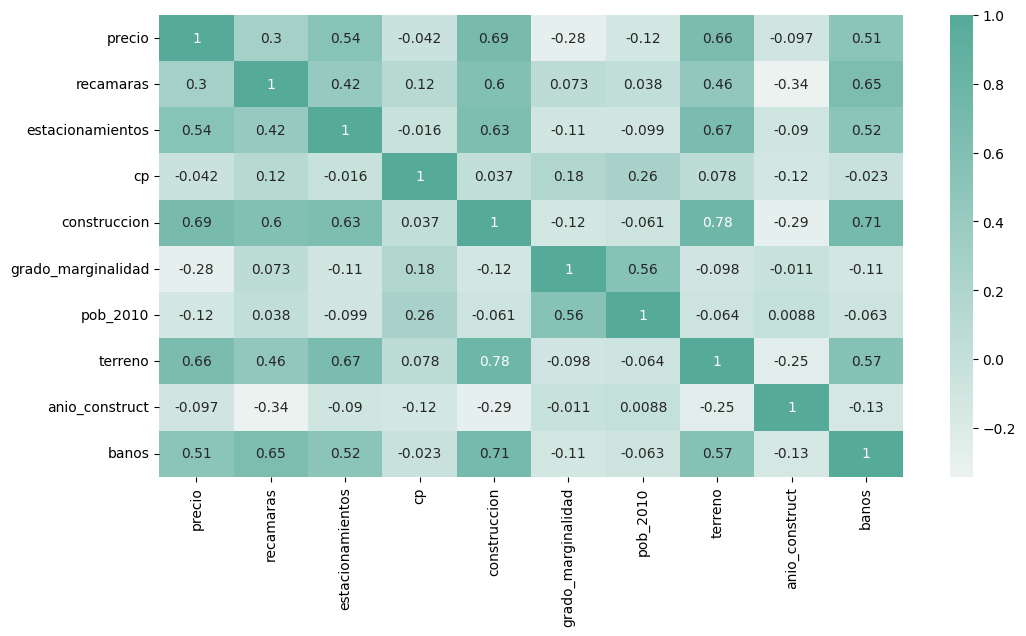

In [175]:
## obtenemos la matriz de correlacion pero ahora visual
plt.figure(figsize=(12,6))
sbn.heatmap(correlation,annot=True, cmap=sbn.color_palette("light:#5A9", as_cmap=True))

In [176]:
# Ahora trabajamos un poco con las variables categoricas
# Vemos que las observaciones no estan distribuidos de manera uniforme sobre 
# las caracteristicas categoricas
df_str_vars['alcaldia'].value_counts()

alcaldia
BENITO JUAREZ             191
ALVARO OBREGON            146
CUAUHTEMOC                102
COYOACAN                  101
MIGUEL HIDALGO             84
IZTAPALAPA                 70
TLALPAN                    65
AZCAPOTZALCO               63
GUSTAVO A. MADERO          61
CUAJIMALPA DE MORELOS      46
VENUSTIANO CARRANZA        38
LA MAGDALENA CONTRERAS     24
IZTACALCO                  20
XOCHIMILCO                 18
TLAHUAC                     6
MILPA ALTA                  1
Name: count, dtype: int64

In [177]:
# Modificamos los valores - por NO Registrado
df_str_vars['tipo_col'] = df_str_vars['tipo_col'].replace('-', 'NO REGISTRADO')
df_str_vars['tipo_col'].value_counts()

/tmp/ipykernel_1117/1804530895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_str_vars['tipo_col'] = df_str_vars['tipo_col'].replace('-', 'NO REGISTRADO')


tipo_col
COLONIA                  843
PUEBLO                    53
UNIDAD HABITACIONAL       47
FRACCIONAMIENTO           25
CONJUNTO HABITACIONAL     25
BARRIO                    19
AMPLIACION                 9
NO REGISTRADO              6
RESIDENCIAL                4
PARAJE                     2
LOCALIDAD                  1
CONDOMINIO                 1
EJIDO                      1
Name: count, dtype: int64

In [178]:
# Vemos que el tipo de seccion no nos aportara mucha informacion
# ya que la mayoria de datos se encuentra dentro de secciones urbanas
df_str_vars['tipo_seccion'].value_counts()

tipo_seccion
URBANO(A)    1029
MIXTO(A)        7
Name: count, dtype: int64

In [179]:
print(df_num_vars.shape, df_str_vars.shape, target.shape)

(1036, 10) (1036, 9) (1036,)


In [180]:
## Ahora pasamos a realizar algunas transformaciones a nuestros datos
## comenzamos estandarizando nuestros datos
from sklearn.preprocessing import StandardScaler
# Quitamos nuestra variable objetivo
# Y tambien nuestra variable que aunque es numerica nos da informacion categorica
# del grado de marginalidad y seguridad
cols_num_vars_std = list(set(df_num_vars.columns)-{'grado_marginalidad','precio'})
print(cols_num_vars_std)

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos solamente numericos
df_num_vars_std = scaler.fit_transform(df_num_vars[cols_num_vars_std])
df_num_vars_std = pd.DataFrame(data=df_num_vars_std,columns=cols_num_vars_std)
print(df_num_vars_std.shape, df_num_vars['grado_marginalidad'].shape)

# Comenzamos a vaciar nuestras caracteristicas en un solo df
df_num_vars_std.reset_index(drop=True, inplace=True)
df_num_vars.reset_index(drop=True, inplace=True)
df_complete = pd.concat([df_num_vars_std,df_num_vars['grado_marginalidad']],axis=1)

print(df_complete.shape)
# revisamos nuestros datos numericos estandarizados
df_complete.head(1)

['recamaras', 'estacionamientos', 'construccion', 'cp', 'pob_2010', 'terreno', 'anio_construct', 'banos']
(1036, 8) (1036,)
(1036, 9)


,recamaras,estacionamientos,construccion,cp,pob_2010,terreno,anio_construct,banos,grado_marginalidad
0,-0.685936,-0.559291,-0.829106,0.029302,2.113765,-0.71393,0.963494,-1.110957,5.0


In [181]:
## Continuamos con la codificacion de nuestras variables categoricas
## Trataremos primeramente con la tecnica de one hot encoder
df_str_vars_dummies = pd.get_dummies(df_str_vars, columns=['alcaldia','tipo_col'])
cols_dummies = list(set(df_str_vars_dummies.columns)-{'ubicacion','colonia','lat_long','lat','long','tipo_seccion'
                                                  ,'precio_str','alcaldia','tipo_col'})
print(len(cols_dummies))
df_str_vars_dummies = df_str_vars_dummies[cols_dummies]
# convertimos todo a enteros
for i in cols_dummies:
    df_str_vars_dummies[i] = df_str_vars_dummies[i].apply(int)
df_str_vars_dummies.head(1)

29


,tipo_col_NO REGISTRADO,tipo_col_UNIDAD HABITACIONAL,tipo_col_BARRIO,tipo_col_CONDOMINIO,tipo_col_PARAJE,alcaldia_TLAHUAC,alcaldia_AZCAPOTZALCO,tipo_col_AMPLIACION,tipo_col_PUEBLO,tipo_col_CONJUNTO HABITACIONAL,...,alcaldia_COYOACAN,alcaldia_CUAUHTEMOC,tipo_col_FRACCIONAMIENTO,alcaldia_MIGUEL HIDALGO,tipo_col_RESIDENCIAL,alcaldia_BENITO JUAREZ,alcaldia_XOCHIMILCO,alcaldia_VENUSTIANO CARRANZA,alcaldia_LA MAGDALENA CONTRERAS,alcaldia_TLALPAN
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [182]:
# Vaciamos nuestras variables dummies en nuestro dataframe final
df_complete.reset_index(drop=True, inplace=True)
df_str_vars_dummies.reset_index(drop=True, inplace=True)
df_complete = pd.concat([df_complete,df_str_vars_dummies],axis=1)
df_complete.head(1)

,recamaras,estacionamientos,construccion,cp,pob_2010,terreno,anio_construct,banos,grado_marginalidad,tipo_col_NO REGISTRADO,...,alcaldia_COYOACAN,alcaldia_CUAUHTEMOC,tipo_col_FRACCIONAMIENTO,alcaldia_MIGUEL HIDALGO,tipo_col_RESIDENCIAL,alcaldia_BENITO JUAREZ,alcaldia_XOCHIMILCO,alcaldia_VENUSTIANO CARRANZA,alcaldia_LA MAGDALENA CONTRERAS,alcaldia_TLALPAN
0,-0.685936,-0.559291,-0.829106,0.029302,2.113765,-0.71393,0.963494,-1.110957,5.0,0,...,0,1,0,0,0,0,0,0,0,0


In [183]:
# Y terminamos con un total de 42 caracteristicas de las cuales buscaremos encontrar cuales nos aporta mas a nuestros modelos
df_complete.shape

(1036, 38)

In [187]:
## comenzaremos ejecutando un algoritmo desde statsmodels sobre todas nuestras variables elegidas
# para ver su significancia mediante su p_value y asi ir descartando variables manualmente
import statsmodels.api as sm
## Creamos nuestro modelo de regresion lineal por minimos cuadrados
target.reset_index(drop=True, inplace=True)
modelo = sm.OLS(target, df_complete)
results = modelo.fit()
## Mostramos el resumen del entrenamiento del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     47.52
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          4.09e-189
Time:                        23:44:33   Log-Likelihood:                -17439.
No. Observations:                1036   AIC:                         3.495e+04
Df Residuals:                     999   BIC:                         3.513e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
recamaras 

array([ 2900000.,  3200000.,  2137000., ...,  4300000., 67000000.,
        3185000.])